In [ ]:
import pandas as pd

# Load the dataset (since CSV uses ; as separator)
data = pd.read_csv("/content/student-mat.csv", sep=';')

# 1. Check the first 5 rows
print("First 5 rows of the dataset:")
print(data.head())

# 2. Check shape (rows, columns)
print("\nShape of dataset:", data.shape)

# 3. Check column names and data types
print("\nDataset info:")
print(data.info())

# 4. Summary statistics for numeric columns
print("\nSummary statistics:")
print(data.describe())

# 5. Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


First 5 rows of the dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Shape of dataset: (395, 33)

Dataset info:
<class 'pandas.

Number of duplicate rows: 0


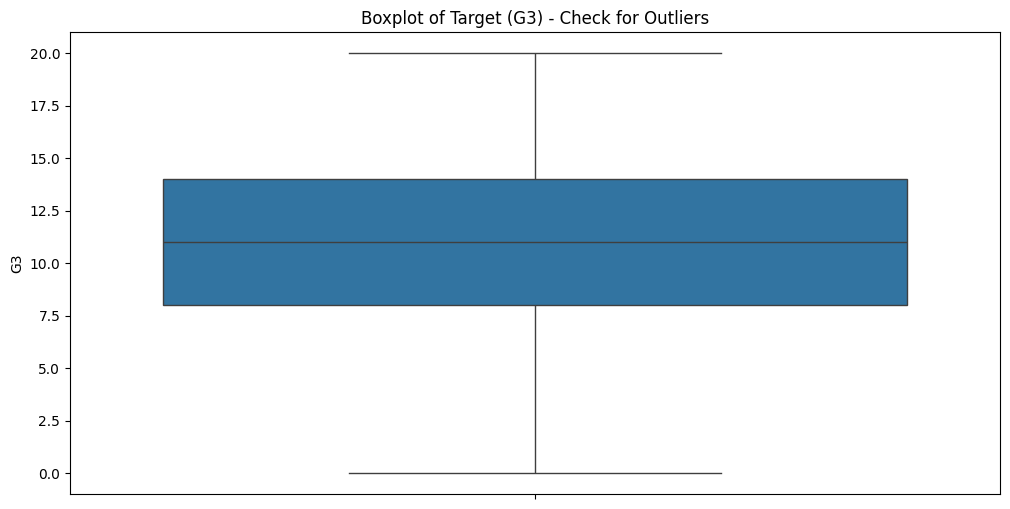

In [ ]:
# 1. Separate features and target
X = data.drop("G3", axis=1)  # All columns except G3
y = data["G3"]               # Target column

# 2. Encode categorical features
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Apply Label Encoding to categorical columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# 3. Optional: Normalize numeric columns (not mandatory for tree-based models)
from sklearn.preprocessing import MinMaxScaler

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# 4. Check for duplicates
print("Number of duplicate rows:", data.duplicated().sum())

# 5. Check for outliers (optional: using boxplot)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=y)
plt.title("Boxplot of Target (G3) - Check for Outliers")
plt.show()


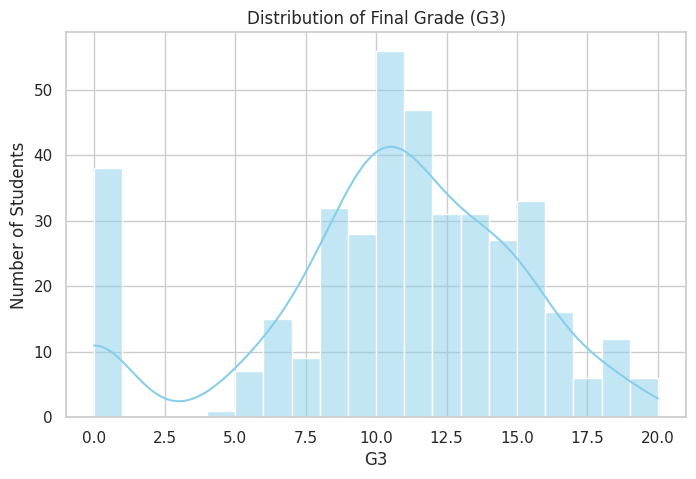

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style for plots
sns.set(style="whitegrid")

# Plot the distribution of final grades (G3)
plt.figure(figsize=(8,5))
sns.histplot(y, bins=20, kde=True, color='skyblue')  # y is your target variable G3
plt.title("Distribution of Final Grade (G3)")
plt.xlabel("G3")
plt.ylabel("Number of Students")
plt.show()


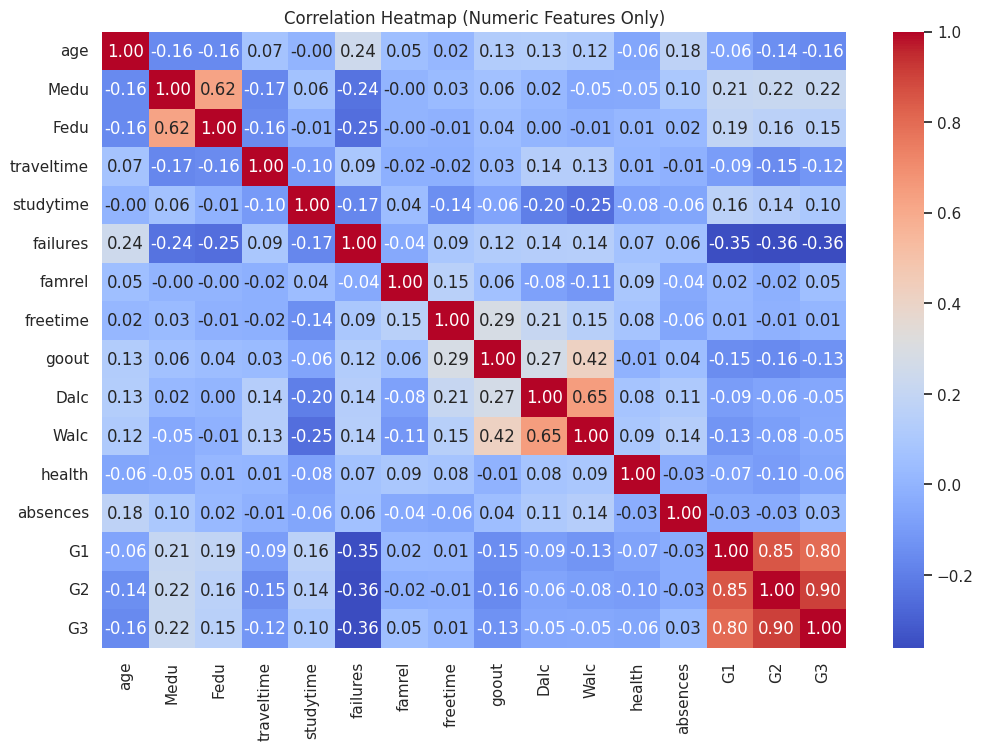

In [ ]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
plt.figure(figsize=(12,8))
corr = numeric_data.corr()  # correlation between numeric features only
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


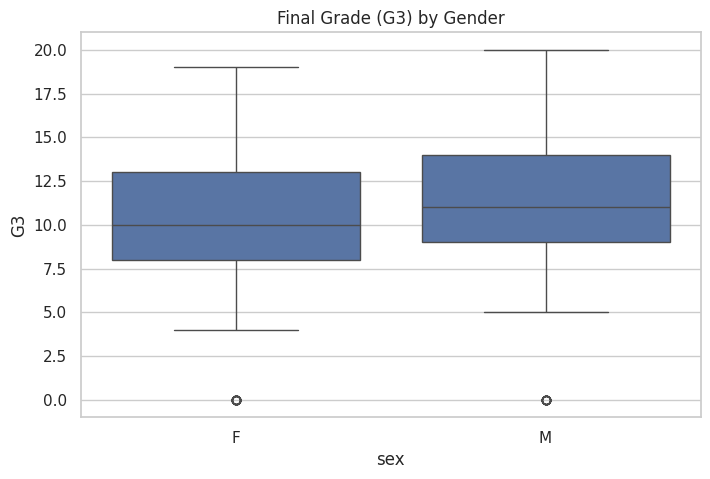

In [ ]:
# Boxplot to compare final grades (G3) by student gender
plt.figure(figsize=(8,5))
sns.boxplot(x='sex', y='G3', data=data)
plt.title("Final Grade (G3) by Gender")
plt.show()


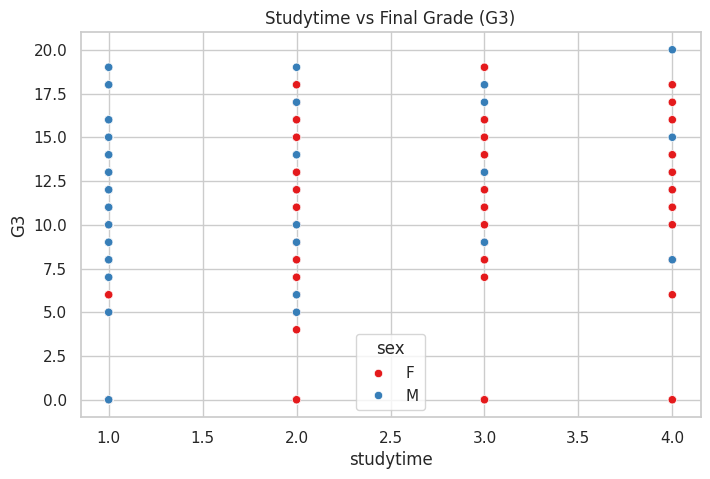

In [ ]:
# Scatterplot to see relation between weekly study time and final grades
plt.figure(figsize=(8,5))
sns.scatterplot(x='studytime', y='G3', data=data, hue='sex', palette='Set1')
plt.title("Studytime vs Final Grade (G3)")
plt.show()


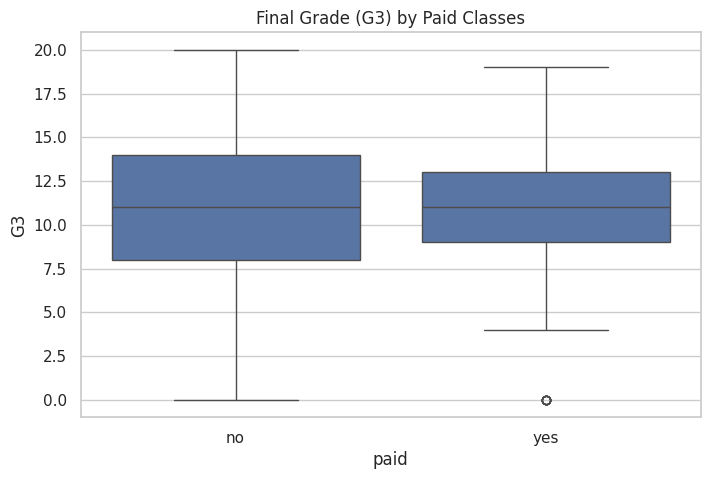

In [ ]:
# Boxplot to analyze effect of paid extra classes on G3
plt.figure(figsize=(8,5))
sns.boxplot(x='paid', y='G3', data=data)
plt.title("Final Grade (G3) by Paid Classes")
plt.show()


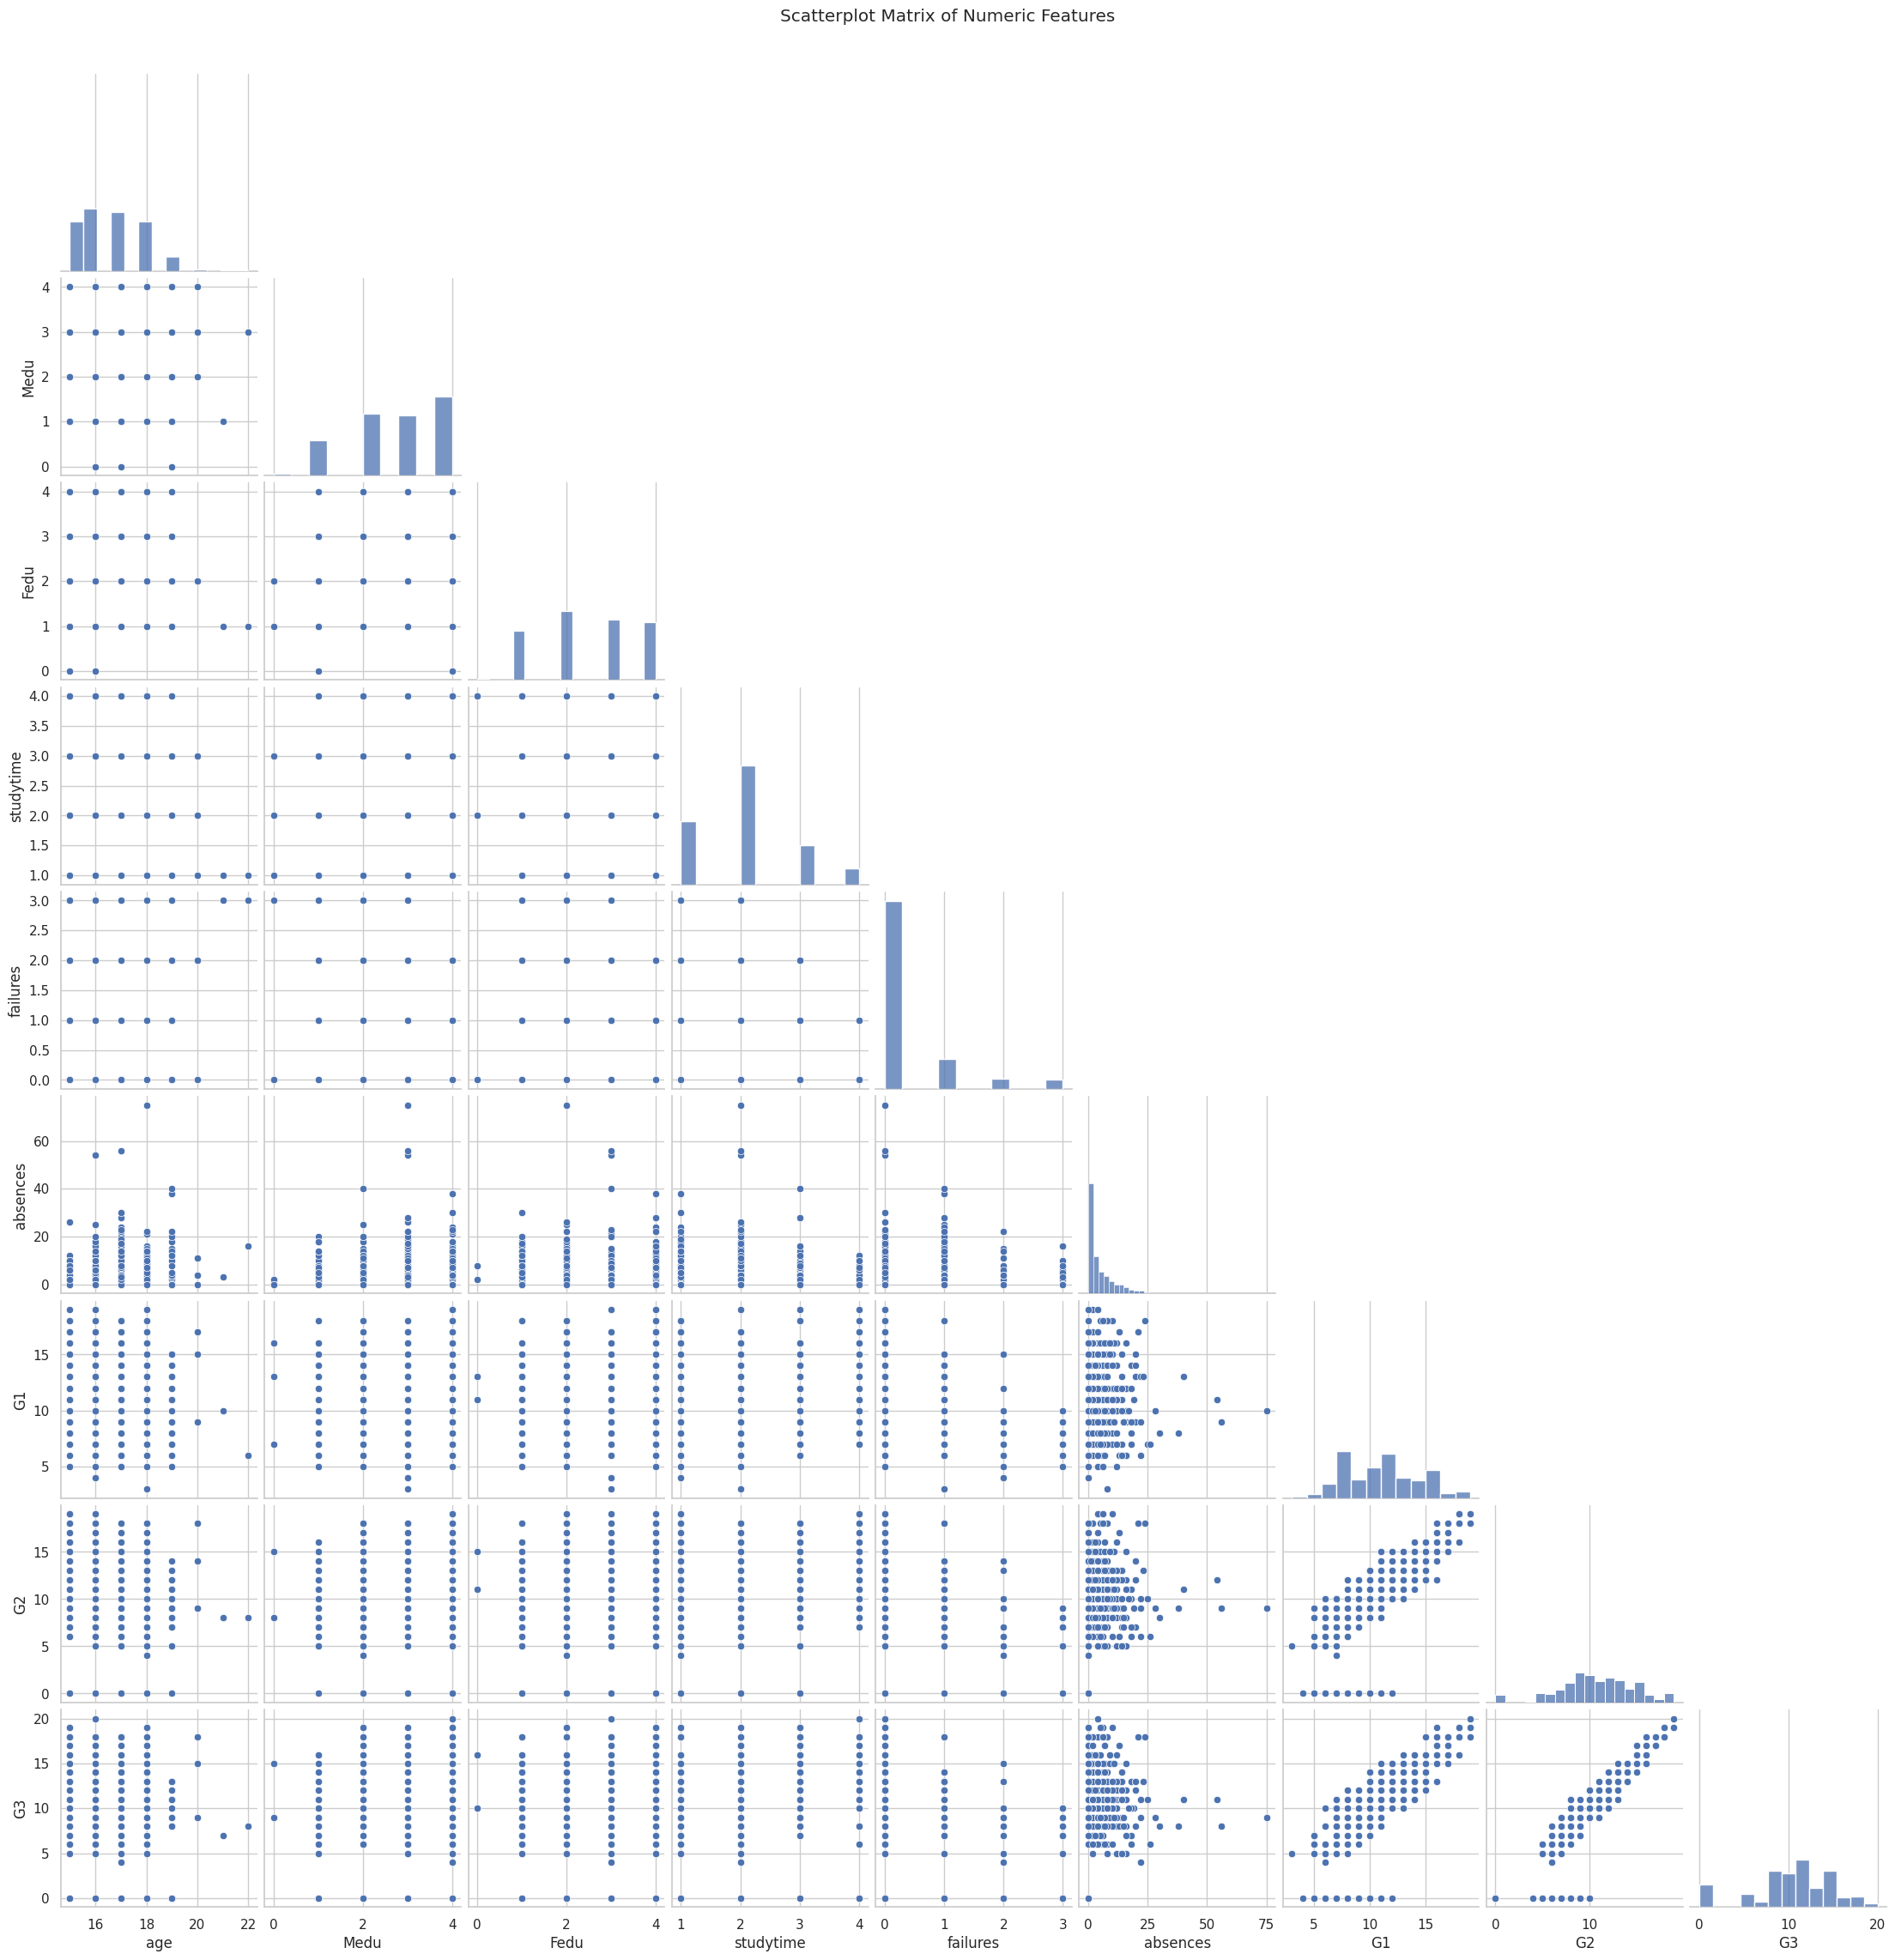

In [ ]:
# Simple scatterplot matrix without hue
sns.pairplot(data[numeric_features], corner=True)
plt.suptitle("Scatterplot Matrix of Numeric Features", y=1.02)
plt.show()


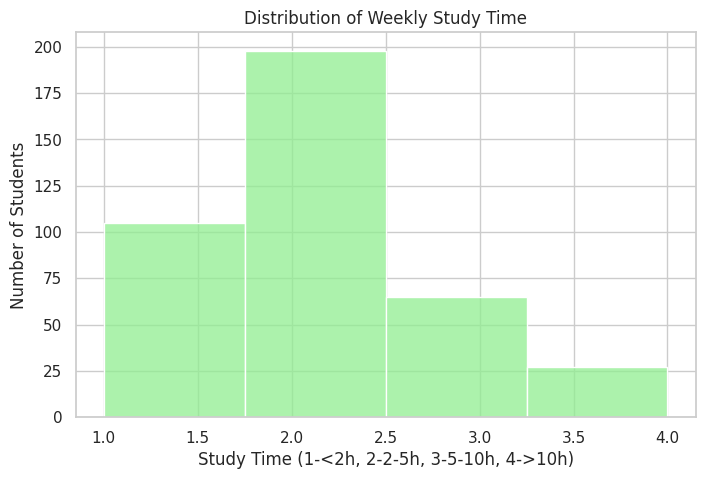

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data['studytime'], bins=4, kde=False, color='lightgreen')
plt.title("Distribution of Weekly Study Time")
plt.xlabel("Study Time (1-<2h, 2-2-5h, 3-5-10h, 4->10h)")
plt.ylabel("Number of Students")
plt.show()


/tmp/ipython-input-888266334.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='guardian', data=data, palette='pastel')


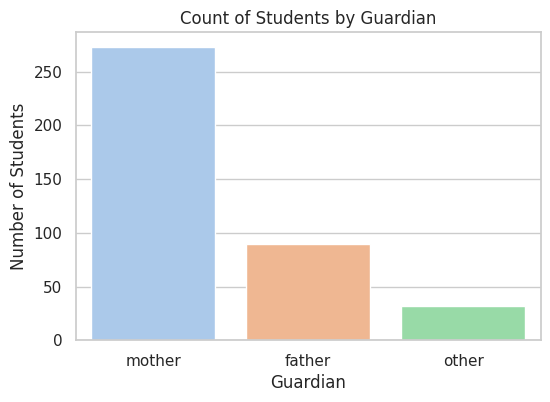

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='guardian', data=data, palette='pastel')
plt.title("Count of Students by Guardian")
plt.xlabel("Guardian")
plt.ylabel("Number of Students")
plt.show()


/tmp/ipython-input-3881901689.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='health', y='G3', data=data, palette='Set2')
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


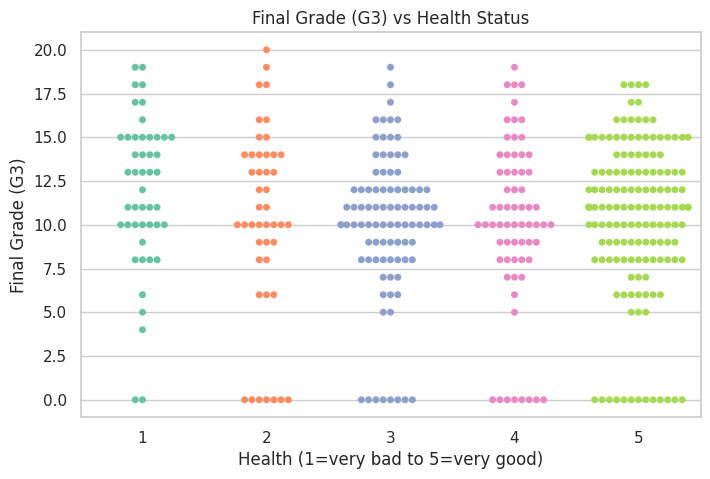

In [ ]:
plt.figure(figsize=(8,5))
sns.swarmplot(x='health', y='G3', data=data, palette='Set2')
plt.title("Final Grade (G3) vs Health Status")
plt.xlabel("Health (1=very bad to 5=very good)")
plt.ylabel("Final Grade (G3)")
plt.show()


/tmp/ipython-input-106153764.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dalc', y='G3', data=data, palette='muted')


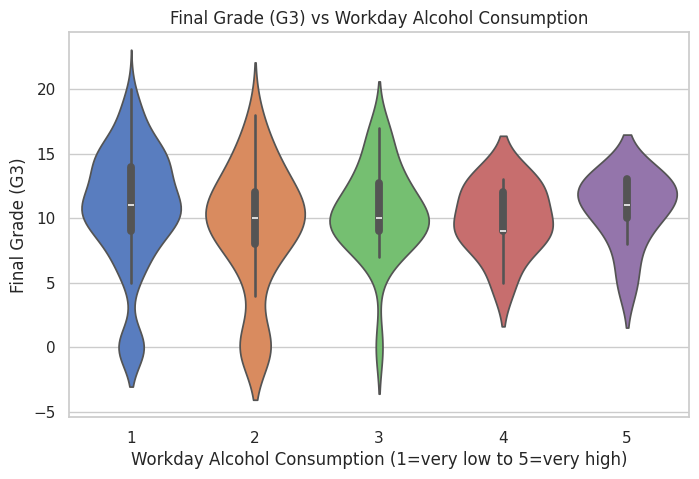

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Dalc', y='G3', data=data, palette='muted')
plt.title("Final Grade (G3) vs Workday Alcohol Consumption")
plt.xlabel("Workday Alcohol Consumption (1=very low to 5=very high)")
plt.ylabel("Final Grade (G3)")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ['school','sex','address','famsize','Pstatus','Mjob','Fjob',
                    'reason','guardian','schoolsup','famsup','paid','activities',
                    'nursery','higher','internet','romantic']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply encoding
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Check first 5 rows after encoding
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# Features (X) and target (y)
X = data.drop('G3', axis=1)
y = data['G3']

# Check shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (395, 32)
Target shape: (395,)


In [ ]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (316, 32)
X_test: (79, 32)
y_train: (316,)
y_test: (79,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Linear Regression
Mean Squared Error: 5.03239410886674
R2 Score: 0.7545777855043501


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor")
print("Mean Squared Error:", mse_rf)
print("R2 Score:", r2_rf)


Random Forest Regressor
Mean Squared Error: 3.4867417721518983
R2 Score: 0.8299569015097052


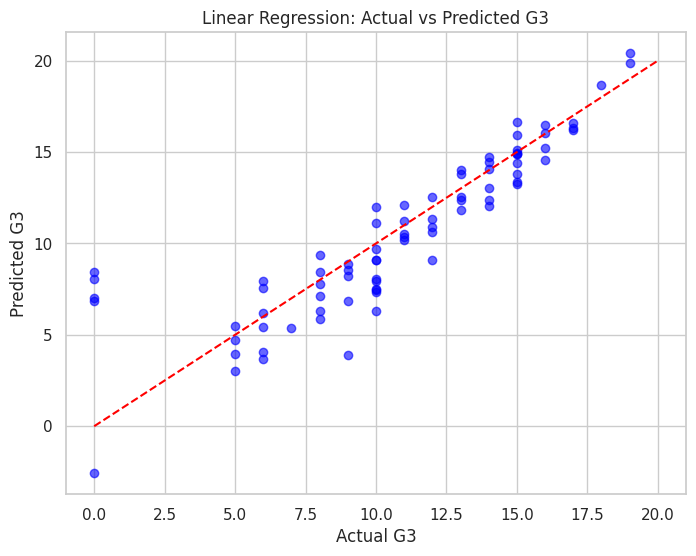

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([0, 20], [0, 20], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Linear Regression: Actual vs Predicted G3")
plt.show()


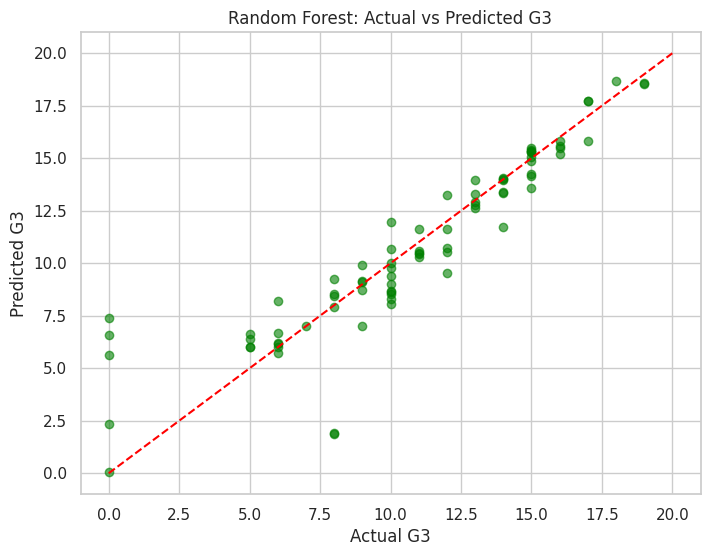

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.plot([0, 20], [0, 20], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Random Forest: Actual vs Predicted G3")
plt.show()


/tmp/ipython-input-2569344898.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


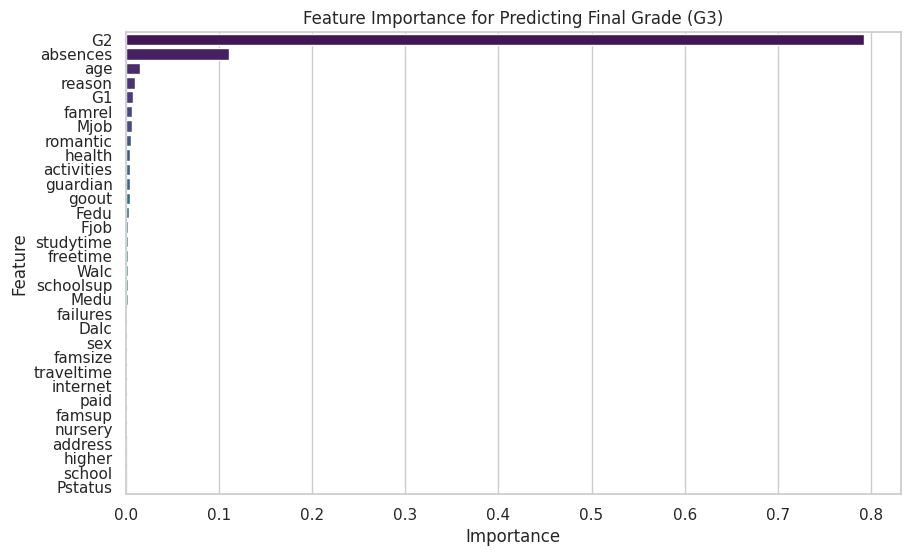

In [ ]:
# Get feature importances from Random Forest model
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title("Feature Importance for Predicting Final Grade (G3)")
plt.show()


In [ ]:
# ========================
# Step 1: Encode Categorical Features
# ========================

from sklearn.preprocessing import LabelEncoder

# Copy the dataset to avoid modifying the original
data_model = data.copy()

# List of categorical columns to encode
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                        'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                        'nursery', 'higher', 'internet', 'romantic']

# Initialize LabelEncoder
le = LabelEncoder()

# Encode each categorical column as numeric
for col in categorical_features:
    data_model[col] = le.fit_transform(data_model[col])

# ========================
# Step 2: Train-Validation-Test Split
# ========================

from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data_model.drop('G3', axis=1)  # All columns except final grade
y = data_model['G3']               # Target column: G3

# Split data into training (70%) and temporary (30%) for validation and test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ========================
# Step 3: Feature Scaling
# ========================

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ========================
# Step 4: Define MLP Regression Model
# ========================

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a Sequential MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer + hidden layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer for regression (predicting G3)
])

# Compile the model with optimizer, loss function and metric
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print model architecture summary
model.summary()

# ========================
# Step 5: Train the Model
# ========================

history = model.fit(
    X_train_scaled, y_train,           # Training data
    validation_data=(X_val_scaled, y_val),  # Validation data
    epochs=50,                         # Number of iterations over the dataset
    batch_size=16                       # Number of samples per gradient update
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,225 (16.50 KB)

 Trainable params: 4,225 (16.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 117.5360 - mae: 9.9882 - val_loss: 99.3339 - val_mae: 8.9639
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 93.1729 - mae: 8.8793 - val_loss: 71.1388 - val_mae: 7.5049
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 63.1031 - mae: 7.2630 - val_loss: 42.4084 - val_mae: 5.6837
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 34.0481 - mae: 5.2331 - val_loss: 22.4420 - val_mae: 3.9259
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.8373 - mae: 3.3978 - val_loss: 14.0170 - val_mae: 2.8777
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.2147 - mae: 2.4145 - val_loss: 11.2543 - val_mae: 2.3745
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.7428 - mae: 2.1119 - val_loss: 9.6370 - val_mae: 2.1676
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0967 - mae: 1.9705 - val_loss: 8.6177 - val_mae: 2.0889
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - los

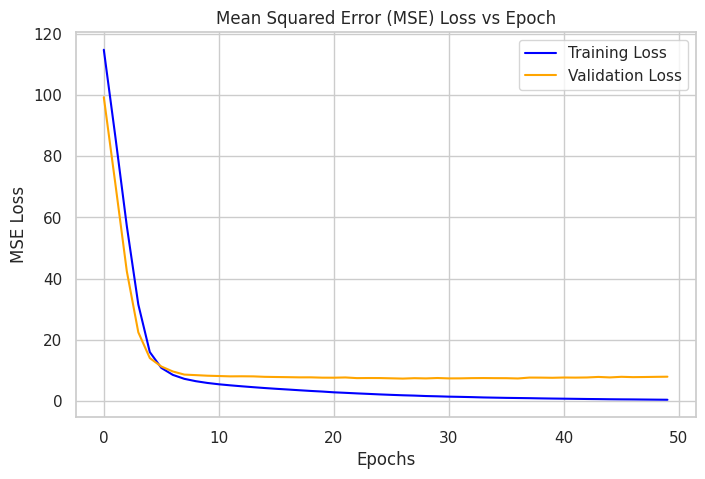

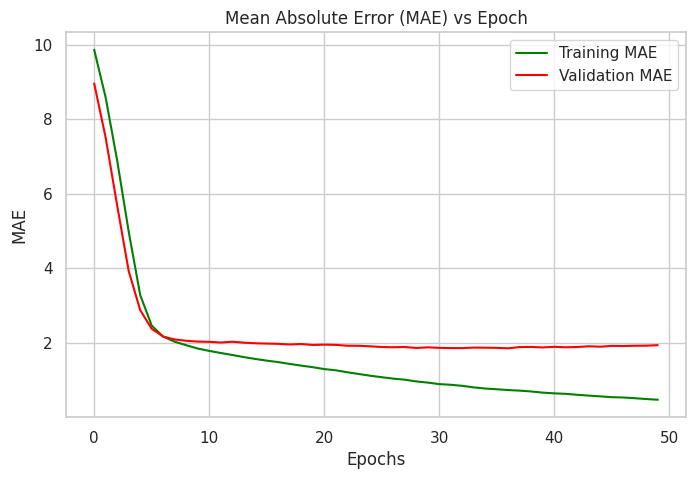

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


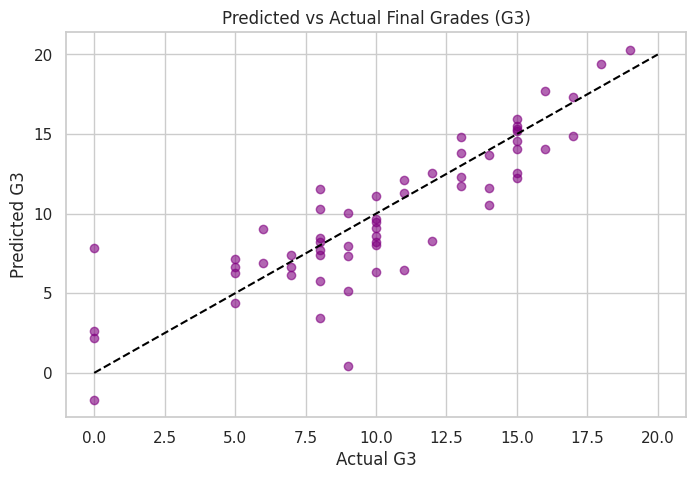

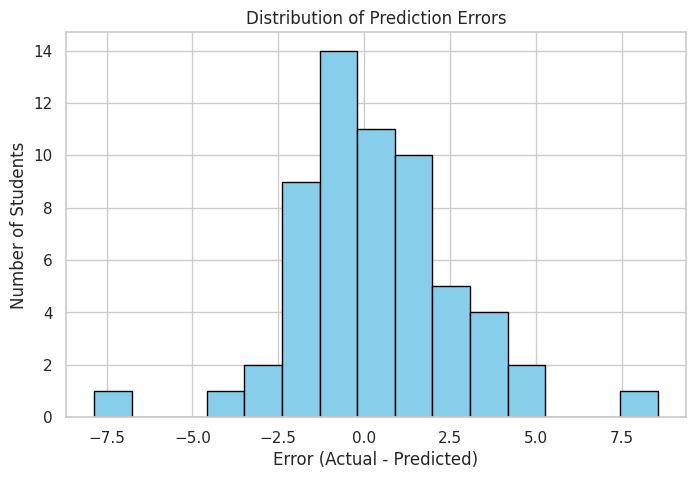

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ========================
# Step 1: Plot Loss vs Epoch
# ========================
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("Mean Squared Error (MSE) Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# ========================
# Step 2: Plot MAE vs Epoch
# ========================
plt.figure(figsize=(8,5))
plt.plot(history.history['mae'], label='Training MAE', color='green')
plt.plot(history.history['val_mae'], label='Validation MAE', color='red')
plt.title("Mean Absolute Error (MAE) vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

# ========================
# Step 3: Compare Predicted vs Actual G3
# ========================

# Predict on test set
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([0, 20], [0, 20], color='black', linestyle='--')  # Perfect prediction line
plt.title("Predicted vs Actual Final Grades (G3)")
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.show()

# ========================
# Step 4: Error Distribution
# ========================

errors = y_test - y_pred.flatten()
plt.figure(figsize=(8,5))
plt.hist(errors, bins=15, color='skyblue', edgecolor='black')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Number of Students")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Predict on test set
y_pred = model.predict(X_test_scaled).flatten()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Create summary table
metrics_table = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)',
               'Root Mean Squared Error (RMSE)', 'R-squared (R²)'],
    'Value': [mse, mae, rmse, r2]
})

metrics_table


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


,Metric,Value
0,Mean Squared Error (MSE),5.825229
1,Mean Absolute Error (MAE),1.766348
2,Root Mean Squared Error (RMSE),2.413551
3,R-squared (R²),0.709159


from matplotlib import pyplot as plt
metrics_table['Value'].plot(kind='hist', bins=20, title='Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
metrics_table.groupby('Metric').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_table['Value'].plot(kind='line', figsize=(8, 4), title='Value')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(metrics_table['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(metrics_table, x='Value', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)